### Problem Statement: A combined-cycle power plant uses both gas and a steam turbine together to produce up to 50 percent more electricity from the same fuel than a traditional simple-cycle plant. The waste heat from the gas turbine is routed to the nearby steam turbine, which generates extra power. All the UN Member States have to submit a report on the combined cycle power plant to the United Nations. The Power Plant officials of Mexico are devising a way to predict the net hourly electrical energy output (PE) of the plant. You are appointed as the chief for this operation. Create a Machine Learning Model to solve this problem efficiently.

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the data
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/CCPP/Training_set_ccpp.csv')
data.head()

,AT,EV,AP,RH,PE
0,29.95,73.42,1011.44,66.32,432.81
1,5.76,40.07,1013.22,62.99,494.67
2,29.44,64.33,1011.40,61.78,442.32
3,32.83,74.33,1011.44,50.42,427.36
4,16.86,39.63,1004.47,83.50,466.68


In [3]:
#Get the description of the data
data.describe()

,AT,EV,AP,RH,PE
count,6410.000000,6410.000000,6410.000000,6410.000000,6410.000000
mean,19.652120,54.298786,1013.227959,73.324212,454.363276
std,7.433792,12.685055,5.932562,14.675569,17.060129
min,1.810000,25.360000,992.890000,26.300000,420.260000
25%,13.580000,41.760000,1009.070000,63.352500,439.832500
50%,20.420000,52.080000,1012.955000,74.980000,451.440000
75%,25.720000,66.540000,1017.257500,84.897500,468.270000
max,35.560000,81.560000,1033.300000,100.160000,495.760000


In [4]:
#Get the info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6410 entries, 0 to 6409
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      6410 non-null   float64
 1   EV      6410 non-null   float64
 2   AP      6410 non-null   float64
 3   RH      6410 non-null   float64
 4   PE      6410 non-null   float64
dtypes: float64(5)
memory usage: 250.5 KB


In [5]:
features = data.iloc[:, :-1]
target = data['PE']
print("Features shape: ", features.shape)
print("Target shape: ", target.shape)

Features shape:  (6410, 4)
Target shape:  (6410,)


In [6]:
#Divide the data into train and test 
def get_train_test(features, target):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.75, random_state=42)

    print("X_train shape: ", X_train.shape)
    print("X_test shape: ", X_test.shape)
    print("Y_train shape: ", y_train.shape)
    print("Y_test shape: ", y_test.shape)
    
    return X_train, X_test, y_train, y_test

In [7]:
#Build a regressor
from sklearn.linear_model import LinearRegression
def regressionModel(X_train, y_train):
    lr = LinearRegression()
    model = lr.fit(X_train, y_train)
    return model

In [8]:
#Evaluate the model
from sklearn.metrics import mean_squared_error
def predictAndEvaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_pred, y_test)
    rmse = mse ** (0.5)
    print("RMSE: ", rmse)
    return rmse

In [9]:
#Get the test data
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/CCPP/Testing_set_ccpp.csv')
test_data.head()

,AT,EV,AP,RH
0,19.64,48.06,1014.81,74.96
1,28.26,69.23,1013.01,42.10
2,27.98,67.17,1007.32,75.29
3,28.64,69.23,1013.11,37.13
4,9.34,38.08,1019.56,67.74


In [10]:
#Predict on test data and store predictions in csv
def createCSV(model, test_data):
    y_hat = model.predict(test_data)
    predictions = pd.DataFrame(y_hat, columns = ['prediction']).to_csv('results.csv', index = False, header = True)

### Simple Linear Regression on all features

In [11]:
X_train, X_test, y_train, y_test = get_train_test(features, target)
lr_model = regressionModel(X_train, y_train)
lr_rmse = predictAndEvaluate(lr_model, X_test, y_test)
createCSV(lr_model, test_data)



X_train shape:  (4807, 4)
X_test shape:  (1603, 4)
Y_train shape:  (4807,)
Y_test shape:  (1603,)
RMSE:  4.638442104309208


### Scaling the features

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(features)
features_scaled = sc.transform(features)
features_scaled

array([[ 1.38538751e+00,  1.50749885e+00, -3.01404146e-01,
        -4.77307458e-01],
       [-1.86892544e+00, -1.12178438e+00, -1.34175735e-03,
        -7.04232885e-01],
       [ 1.31677653e+00,  7.90851634e-01, -3.08147121e-01,
        -7.86689271e-01],
       ...,
       [ 1.09479983e+00,  1.17716311e+00, -6.20285326e-02,
        -1.88179186e+00],
       [-9.94471776e-01, -1.00904450e+00,  2.76805962e-01,
         1.09617846e+00],
       [-1.06308276e+00, -1.08394162e+00,  8.19615452e-01,
         1.66110692e+00]])

In [13]:
test_data_scaled = sc.fit_transform(test_data)
test_data_scaled

array([[-1.25855123e-03, -4.90826112e-01,  2.50006017e-01,
         1.16428188e-01],
       [ 1.14957219e+00,  1.16903171e+00, -5.24697943e-02,
        -2.15821928e+00],
       [ 1.11219022e+00,  1.00751507e+00, -1.00862944e+00,
         1.39271574e-01],
       ...,
       [ 1.56611418e+00,  1.33290052e+00, -6.97751525e-01,
        -8.90065243e-01],
       [-9.70519710e-01, -6.90761749e-01,  4.75182454e-01,
         5.60143656e-01],
       [ 3.60545545e-01,  8.85201509e-01,  4.95347509e-01,
         4.51291351e-02]])

In [14]:
X_train, X_test, y_train, y_test = get_train_test(features_scaled, target)
lr_scaled_model = regressionModel(X_train, y_train)
lr_scaled_rmse = predictAndEvaluate(lr_scaled_model, X_test, y_test)
createCSV(lr_scaled_model, test_data_scaled)

X_train shape:  (4807, 4)
X_test shape:  (1603, 4)
Y_train shape:  (4807,)
Y_test shape:  (1603,)
RMSE:  4.638442104309208


### Applying PCA

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
features_reduced = pca.fit_transform(features)
features_reduced

array([[ 20.03514746, -10.6877844 ],
       [ -5.93024256,  19.59741809],
       [ 17.9489378 ,  -1.35964217],
       ...,
       [ 31.46961904,   6.88565458],
       [-21.85057978,  -0.40479428],
       [-28.95458134,  -4.68020164]])

In [16]:
test_data_reduced = pca.fit_transform(test_data)
test_data_reduced

array([[ -5.05728963,   3.18987692],
       [ 33.91671656,  10.3390723 ],
       [ 10.1506568 , -12.72696879],
       ...,
       [ 24.05644899,  -5.31672886],
       [-14.00791942,   2.13999396],
       [  6.88486539,  -7.75118945]])

In [17]:
X_train, X_test, y_train, y_test = get_train_test(features_reduced, target)
lr_reduced_model = regressionModel(X_train, y_train)
lr_reduced_rmse = predictAndEvaluate(lr_reduced_model, X_test, y_test)
createCSV(lr_reduced_model, test_data_reduced)

X_train shape:  (4807, 2)
X_test shape:  (1603, 2)
Y_train shape:  (4807,)
Y_test shape:  (1603,)
RMSE:  6.7714965137714715


### Feature Selection

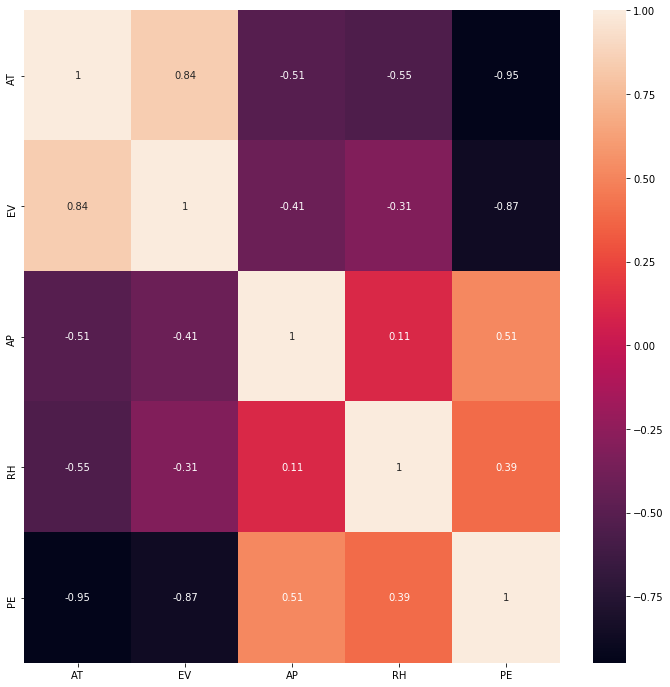

In [18]:
#Get the correlation among columns
plt.rcParams['figure.figsize'] = 12, 12
sns.heatmap(data.corr(), annot = True)

In [19]:
#Consider only AT
features_selected = data['AT'].values
target = data['PE']
features_selected = features_selected.reshape(-1, 1)
features_selected

array([[29.95],
       [ 5.76],
       [29.44],
       ...,
       [27.79],
       [12.26],
       [11.75]])

In [20]:
test_data_selected = test_data['AT'].values.reshape(-1, 1)
test_data_selected

array([[19.64],
       [28.26],
       [27.98],
       ...,
       [31.38],
       [12.38],
       [22.35]])

In [21]:
X_train, X_test, y_train, y_test = get_train_test(features_selected, target)
lr_selected_model = regressionModel(X_train, y_train)
lr_selected_rmse = predictAndEvaluate(lr_selected_model, X_test, y_test)
createCSV(lr_selected_model, test_data_selected)

X_train shape:  (4807, 1)
X_test shape:  (1603, 1)
Y_train shape:  (4807,)
Y_test shape:  (1603,)
RMSE:  5.475560870577123


### Random Forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
rf = RandomForestRegressor(n_estimators = 10)
X_train, X_test, y_train, y_test = train_test_split(features, target)
model = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rmse = mean_squared_error(y_pred, y_test) ** (0.5)
print("RMSE: ", rmse)

RMSE:  3.4217580315096607


In [23]:
model = rf.fit(features, target)
createCSV(model, test_data)

In [24]:
#HyperParameter Tuning RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [25]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [26]:
#Get the best score
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [27]:
rf = RandomForestRegressor(n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=20, bootstrap=True)
model = rf.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_pred, y_test) ** (0.5)
print("RMSE: ", rmse)

RMSE:  3.182109016521087


In [28]:
createCSV(model, test_data)

### Boosting Algorithms

In [29]:
!pip install xgboost
from xgboost import XGBRegressor

In [30]:
xgb_params = {
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'learning_rate': 0.1,
    'max_depth': 8,
    'min_child_weight': 1
}
xgb = XGBRegressor(**xgb_params, n_estimators=700)
model = xgb.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_pred, y_test) ** (0.5)
print("RMSE: ", rmse)

RMSE:  3.0217020881976895


In [31]:
model = xgb.fit(features, target)
createCSV(model, test_data)